In [1]:
import sys
sys.path.append('../../activedrops')

import matplotlib.pyplot as plt
import numpy as np
import viz
viz.set_plotting_style()

In [2]:
def concentration_nM(length_bp, concentration_ng_per_ul, drop_volume=7):
    # Average molecular weight of a base pair (g/mol)
    average_mw_per_bp = 650
    
    # Convert ng/µL to g/L
    concentration_g_per_l = concentration_ng_per_ul * 1e-6
    
    # Molecular weight of the DNA (g/mol)
    molecular_weight = length_bp * average_mw_per_bp
    
    # Volume of 1 liter in microliters
    volume_ul = 1e6
    
    # Concentration in moles per liter (M)
    concentration_m = concentration_g_per_l / molecular_weight
    
    # Convert concentration from M to nM
    concentration_nM = concentration_m * 1e12
    
    return concentration_nM/drop_volume


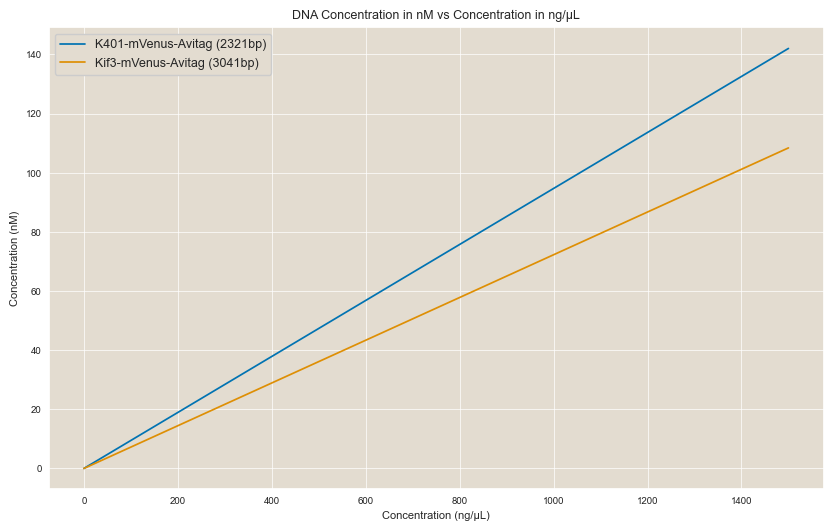

In [3]:
# Define the concentration range and the sizes of the two DNA sequences
concentration_range_ng_per_ul = np.linspace(0, 1500, 100)  # 100 points between 0 and 1500
size_K401 = 2321
size_Kif3 = 3041

# Calculate the concentrations in nM for each DNA sequence
concentration_K401_nM = [concentration_nM(size_K401, conc) for conc in concentration_range_ng_per_ul]
concentration_Kif3_nM = [concentration_nM(size_Kif3, conc) for conc in concentration_range_ng_per_ul]
# Plot the concentrations
plt.figure(figsize=(10, 6))
plt.plot(concentration_range_ng_per_ul, concentration_K401_nM, label='K401-mVenus-Avitag (2321bp)')
plt.plot(concentration_range_ng_per_ul, concentration_Kif3_nM, label='Kif3-mVenus-Avitag (3041bp)')
plt.xlabel('Concentration (ng/µL)')
plt.ylabel('Concentration (nM)')
plt.title('DNA Concentration in nM vs Concentration in ng/µL')
plt.legend()
plt.grid(True)
plt.show()
